In [137]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [138]:
pd.set_option('max_colwidth', 800)

TWEETS_PATH= "../data/raw_tweets_text.csv"
SENTIMENT_PATH="../data/t4sa_text_sentiment.tsv"

#load data
tweets_df = pd.read_csv(TWEETS_PATH, encoding='latin-1', header=0)
sentiment_df= pd.read_csv(SENTIMENT_PATH, sep='\t', header=0)

# Basic Information

In [139]:
print(tweets_df.shape)
print(sentiment_df.shape)

(3452663, 2)
(1179957, 4)


In [140]:
print(tweets_df.head())
print(sentiment_df.head())

                   id  \
0  758014713804587008   
1  758014717990428672   
2  758014646716665857   
3  758014655071526912   
4  758014642526429184   

                                                                                                                                             text  
0  RT @polarcomic: And surprise! the #RegularShow #38 has a short story written and illustrated (and even lettered) by me. https://t.co/kCctJpâ¦  
1                                             RT @SweetBabyBellB: My unproblematic fav who knows Bellarke is fucking real https://t.co/A9RK5b0Hfm  
2                                                                    RT @WhyLarryIsReal: I mean we know harry isn't human https://t.co/fW2TEwSHEq  
3          RT @Eastbay: She's ready, resilient, and on our latest cover. Snag a copy to find out more about @crysdunn_19. https://t.co/j4JwiEgCmd  
4                             RT @SheeeRatchet: find someone who loves you as much as Pikachu loves his bottl

In [141]:
print(tweets_df.describe())
print(sentiment_df.describe())

                 id
count  3.452663e+06
mean   7.865426e+17
std    1.381574e+16
min    7.580146e+17
25%    7.695707e+17
50%    7.862700e+17
75%    7.993751e+17
max    8.046194e+17
               TWID           NEG           NEU           POS
count  1.179957e+06  1.179957e+06  1.179957e+06  1.179957e+06
mean   7.860716e+17  1.214643e-01  5.272504e-01  3.512854e-01
std    1.386547e+16  2.489799e-01  3.953345e-01  3.879292e-01
min    7.680969e+17  2.930239e-14  2.250815e-03  2.441870e-14
25%    7.692905e+17  1.118029e-02  8.237851e-02  7.404817e-02
50%    7.839379e+17  1.924086e-02  8.548171e-01  1.057651e-01
75%    7.996407e+17  3.546559e-02  8.904971e-01  8.860867e-01
max    8.046194e+17  9.939882e-01  1.000000e+00  9.965788e-01


# Cleaning the Data

In [142]:


print("Duplicate amounts in tweets_df:")
print(tweets_df['id'].duplicated().sum()) # There are no duplicates in either dataset

print("Duplicate amounts in sentiment_df:")
print(sentiment_df.duplicated().sum())

# Check for missing values in tweets_df
print("Missing values in tweets_df:")
print(tweets_df.isna().sum())

# Check for missing values in sentiment_df
print("\nMissing values in sentiment_df:")
print(sentiment_df.isna().sum())



Duplicate amounts in tweets_df:
0
Duplicate amounts in sentiment_df:
0
Missing values in tweets_df:
id      0
text    0
dtype: int64

Missing values in sentiment_df:
TWID    0
NEG     0
NEU     0
POS     0
dtype: int64


In [143]:
merged_df = pd.merge(tweets_df, sentiment_df, left_on='id', right_on='TWID')
merged_df = merged_df.drop(columns=['TWID']) # since its alr in id

main_df = merged_df.copy()

In [144]:
# Useful functions to help extract data from the columns

def extract_username_from_text(text):     # Extracts the username from retweets (e.g., "RT @user:").
    match = re.search(r'^RT @([^\s:]+):', text)
    return match.group(1) if match else None
     
def extract_links_from_text(text): # Extracts URLs from tweet text.
    urls = re.findall(r'https?://\S+', text)
    if not urls:
        return None
    return urls[0] if len(urls) == 1 else urls
           
def extract_hashtags_from_text(text): # Extract hashtags from the tweet text
    hashtags = re.findall(r'#\w+', text)
    if not hashtags:
        return None
    return hashtags[0] if len(hashtags) == 1 else hashtags
    
def extract_mentions_from_text(text): # Extract mentions from the tweet text
    cleaned_text = re.sub(r'^RT @[^\s:]+: ', '', text) # Remove the initial retweet username (e.g., "RT @user:")
    mentions = re.findall(r'@\w+', cleaned_text)
    if not mentions:
        return None
    return mentions[0] if len(mentions) == 1 else mentions



def clean_tweet_text(text: str):
    """
    Cleans the tweet text for EDA by removing noise such as:
    - Retweet prefixes (RT @user:)
    - URLs
    - HTML entities (e.g., &amp;)
    - Extra whitespace
    """
    # Remove retweet header
    text = re.sub(r'^RT @[^\s:]+: ', '', text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove HTML entities like &amp;
    text = re.sub(r'&\w+;', '', text)
    
    # Remove extra spaces and trim
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [145]:
# Start adding extra columns that might help us with visualizations
main_df['is_retweet'] = main_df['text'].str.startswith('RT ')
main_df['username'] = main_df['text'].apply(extract_username_from_text)
main_df['urls'] = main_df['text'].apply(extract_links_from_text)
main_df['cleaned_text'] = main_df['text'].apply(clean_tweet_text)
main_df['hashtags'] = main_df['text'].apply(extract_hashtags_from_text)
main_df['mentions'] = main_df['text'].apply(extract_mentions_from_text)

main_df


,id,text,NEG,NEU,POS,is_retweet,username,urls,cleaned_text,hashtags,mentions
0,768097627686604801,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https://t.co/ejnA78Sks0,0.008090,0.042331,0.949579,False,None,"[https://t.co/antImqAo4Y, https://t.co/ejnA78Sks0]",Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday,None,None
1,768097631864102912,RT @2pmthailfans: [Pic] Nichkhun from krjeong86's IG https://t.co/5gcAcu9by7,0.014644,0.926557,0.058800,True,2pmthailfans,https://t.co/5gcAcu9by7,[Pic] Nichkhun from krjeong86's IG,None,None
2,768097640278089729,RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all odds! #JI_PakZindabadRallies https://t.co/1oâ¦,0.004939,0.029469,0.965591,True,MianUsmanJaved,https://t.co/1oâ¦,Congratulations Pakistan on becoming #No1TestTeam in the world against all odds! #JI_PakZindabadRallies,"[#No1TestTeam, #JI_PakZindabadRallies]",None
3,768097627695042560,"RT @PEPalerts: This September, @YESmag is taking you to Maine Mendozaâs surprise thanksgiving party she threw for her fans! https://t.co/oXâ¦",0.006389,0.018663,0.974948,True,PEPalerts,https://t.co/oXâ¦,"This September, @YESmag is taking you to Maine Mendozaâs surprise thanksgiving party she threw for her fans!",None,@YESmag
4,768096868504969216,#Incredible #India #Atulya #Bharat - Land of Seekers #BeProud ð ð®ð³ :|: Plz RT https://t.co/vpghReZWsa,0.049398,0.861395,0.089207,False,None,https://t.co/vpghReZWsa,#Incredible #India #Atulya #Bharat - Land of Seekers #BeProud ð ð®ð³ :|: Plz RT,"[#Incredible, #India, #Atulya, #Bharat, #BeProud]",None
...,...,...,...,...,...,...,...,...,...,...,...
1179952,804618351179874304,@LizHudston @KymWyllie @Evasmiless @meanBok @linddyloo66 @Minna1971 morning girls have a wonderful #Friday https://t.co/unkV2p7JYF,0.006605,0.024448,0.968946,False,None,https://t.co/unkV2p7JYF,@LizHudston @KymWyllie @Evasmiless @meanBok @linddyloo66 @Minna1971 morning girls have a wonderful #Friday,#Friday,"[@LizHudston, @KymWyllie, @Evasmiless, @meanBok, @linddyloo66, @Minna1971]"
1179953,804618548312031232,#RT #Follow Colin Kaepernick debated merits of Castro'sâ¦ - The Mercury News https://t.co/XtrtILIfBl https://t.co/lvUwwdsD4b,0.028834,0.857713,0.113453,False,None,"[https://t.co/XtrtILIfBl, https://t.co/lvUwwdsD4b]",#RT #Follow Colin Kaepernick debated merits of Castro'sâ¦ - The Mercury News,"[#RT, #Follow]",None
1179954,804618716084391936,I am now live on webcam find me here &gt;&gt; https://t.co/yg0pJss4MK download our app &gt;&gt; here https://t.co/QMXtTx4Gcr https://t.co/qxJFN7ZO5U,0.018679,0.927865,0.053456,False,None,"[https://t.co/yg0pJss4MK, https://t.co/QMXtTx4Gcr, https://t.co/qxJFN7ZO5U]",I am now live on webcam find me here download our app here,None,None
1179955,804618934158757889,Pearl Roadshow 4-piece Complete Drum Set with Cymb https://t.co/gQ2TdFKnma https://t.co/PL2FXvWRo9,0.019658,0.907034,0.073308,False,None,"[https://t.co/gQ2TdFKnma, https://t.co/PL2FXvWRo9]",Pearl Roadshow 4-piece Complete Drum Set with Cymb,None,None


# EDA Vince

In [180]:
sum = main_df['NEG'] + main_df['NEU'] + main_df['POS']
sum

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1179952    1.0
1179953    1.0
1179954    1.0
1179955    1.0
1179956    1.0
Length: 1179957, dtype: float64

NEU, NEG, and POS are probabilities

In [173]:
# Correlatoin between NEG, NEU and POS
main_df[['NEG', 'NEU', 'POS']].corr()

,NEG,NEU,POS
NEG,1.000000,-0.344362,-0.290882
NEU,-0.344362,1.000000,-0.798072
POS,-0.290882,-0.798072,1.000000


# Distributions of NEG, NEU and POS

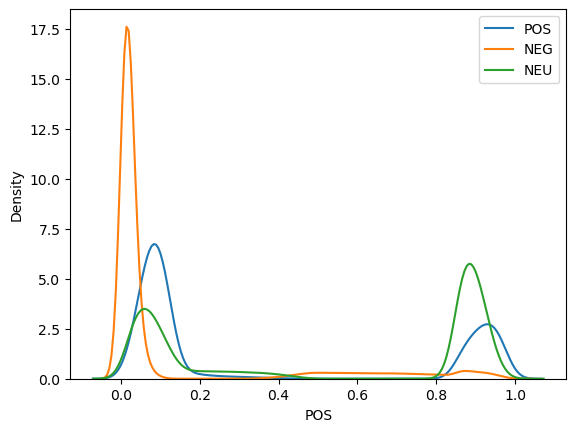

In [172]:
sns.kdeplot(main_df['POS'], label='POS')
sns.kdeplot(main_df['NEG'], label='NEG')
sns.kdeplot(main_df['NEU'], label='NEU')
plt.legend()

In [182]:
def plot_score_distribution(col_name):
    mean = main_df[col_name].median()
    series = main_df .sort_values(by=col_name).reset_index(drop=True)[col_name]
    print(series.head())
    plt.figure(figsize=(8,5))
    sns.histplot( series )
    plt.xlabel(f"{col_name} values")
    plt.ylabel('Index')
    plt.title(f"Distribution of {col_name} scores")
    plt.show()

## NEG scores

0    2.930239e-14
1    2.974166e-14
2    3.052548e-14
3    3.266921e-14
4    3.296539e-14
Name: NEG, dtype: float64


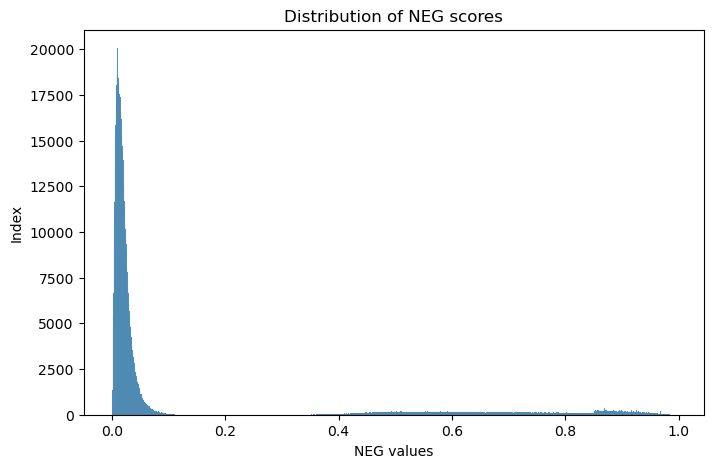

In [183]:
plot_score_distribution('NEG')

There a not a lot in the middle which means more values either more negative or more positive

## NEU scores

0    0.002251
1    0.002866
2    0.003330
3    0.003411
4    0.003513
Name: NEU, dtype: float64


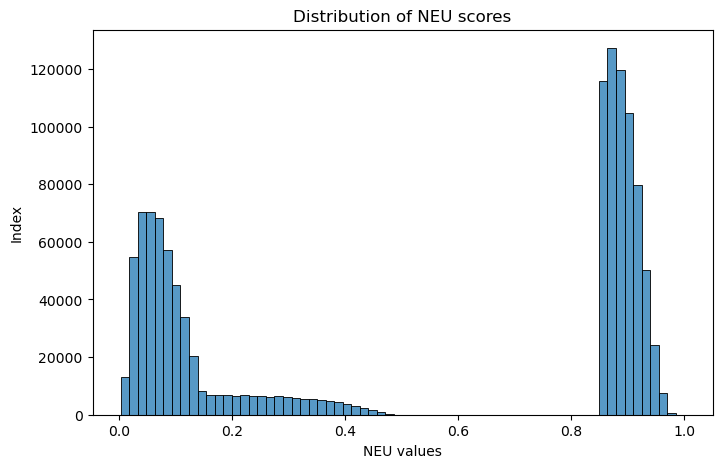

In [184]:

plot_score_distribution('NEU')

There not a lot of neutral middle values

## POS scores

0    2.441870e-14
1    2.506305e-14
2    3.110610e-14
3    3.249926e-14
4    3.817436e-14
Name: POS, dtype: float64


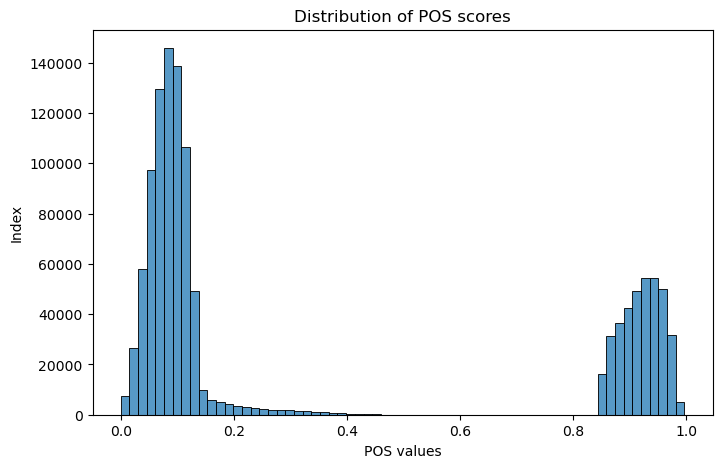

In [186]:

plot_score_distribution('POS')
# main_df['POS'].describe()

There are less values in the middle meaning more non-positive and positive

# Common Words